In [102]:
import pandas as pd


In [103]:
file_path = "/Users/emiliodulay/Documents/Programming/Math-42-Final-Project/GLHYD_data_metric.csv"
df = pd.read_csv(file_path)
df.shape

(1284, 7)

# Formatting

In [104]:
df.head(15)


,# Coordinated Monthly Mean Lakewide Average Water Levels,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,# Period of record: 1918-2023,NaN,NaN,NaN,NaN,NaN,NaN
1,"# Units: meters, IGLD 1985",NaN,NaN,NaN,NaN,NaN,NaN
2,# Calculated using the coordinated gage networ...,NaN,NaN,NaN,NaN,NaN,NaN
3,"# Superior: Marquette and Point Iroquois, MI; ...",NaN,NaN,NaN,NaN,NaN,NaN
4,"# Michigan-Huron: Harbor Beach, Mackinaw City ...",NaN,NaN,NaN,NaN,NaN,NaN
5,"# St. Clair: St. Clair Shores, MI and Belle Ri...",NaN,NaN,NaN,NaN,NaN,NaN
6,"# Erie: Toledo and Cleveland, OH; Port Stanley...",NaN,NaN,NaN,NaN,NaN,NaN
7,"# Ontario: Oswego and Rochester, NY; Cobourg, ...",NaN,NaN,NaN,NaN,NaN,NaN
8,#,NaN,NaN,NaN,NaN,NaN,NaN
9,# Last modified March 2024 Contact: Deanna.C.F...,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
notes = []
for i in range(0,10):
    notes.append(df.iloc[i,0])
    
notes


['# Period of record: 1918-2023',
 '# Units: meters, IGLD 1985',
 '# Calculated using the coordinated gage network, consisting of:',
 '# Superior: Marquette and Point Iroquois, MI; Duluth, MN; Michipicoten and Thunder Bay, Ontario',
 '# Michigan-Huron: Harbor Beach, Mackinaw City and Ludington, MI; Milwaukee, WI; Thessalon and Tobermory, Ontario',
 '# St. Clair: St. Clair Shores, MI and Belle River, Ontario',
 '# Erie: Toledo and Cleveland, OH; Port Stanley and Port Colborne, Ontario',
 '# Ontario: Oswego and Rochester, NY; Cobourg, Port Weller, Toronto, and Kingston, Ontario',
 '#',
 '# Last modified March 2024 Contact: Deanna.C.Fielder@usace.army.mil']

In [106]:
df.columns = df.iloc[11,:] # Rename columns to month, year and lake
df = df.iloc[12:,:].reset_index()
df = df.drop('index', axis = 1)
df.columns.name = 'index' # rename index column to index

In [107]:
df['month'] = df['month'].map({
                'jan' : 1,
                'feb' : 2,
                'mar' : 3,
                'apr' : 4,
                'may' : 5,
                'jun' : 6,
                'jul' : 7,
                'aug' : 8,
                'sep' : 9,
                'oct' : 10,
                'nov' : 11,
                'dec' : 12
                })

df.head()

index,month,year,Superior,Michigan-Huron,St. Clair,Erie,Ontario
0,1,1918,183.25,176.71,174.59,173.9,74.74
1,2,1918,183.2,176.73,174.74,173.82,74.72
2,3,1918,183.17,176.8,174.74,174.01,74.92
3,4,1918,183.14,176.89,174.84,174.02,75.1
4,5,1918,183.22,176.99,175,173.98,75.09


In [108]:
# Makes Lake a column 
df_melt = pd.melt(frame = df, 
                  id_vars = ["month", "year"], 
                  value_vars = ["Superior", "Michigan-Huron", "St. Clair", "Erie", "Ontario"],
                  var_name = "Lake",
                  value_name = "Water Level"
                  )

In [109]:
df_melt.shape

(6360, 4)

In [110]:
df.tail(5)

index,month,year,Superior,Michigan-Huron,St. Clair,Erie,Ontario
1267,8,2023,183.67,176.7,175.52,174.59,75.06
1268,9,2023,183.63,176.64,175.44,174.55,74.88
1269,10,2023,183.55,176.56,175.28,174.39,74.66
1270,11,2023,183.46,176.51,175.17,174.29,74.49
1271,12,2023,183.37,176.44,175.13,174.26,74.49


# Data Cleaning

In [111]:
df_melt['year'] = pd.to_numeric(df_melt['year'], errors = "raise")
df_melt['Water Level'] = pd.to_numeric(df_melt['Water Level'], errors = "raise")
df_melt.dtypes

month            int64
year             int64
Lake            object
Water Level    float64
dtype: object

In [112]:
df_melt.isna().sum()

month          0
year           0
Lake           0
Water Level    0
dtype: int64

In [113]:
df_melt.isnull().sum()

month          0
year           0
Lake           0
Water Level    0
dtype: int64

# Exploratory Data Analysis

In [114]:
# Average Water Level for every Lake for the entire time period.
mean_water_level_total = df_melt.groupby("Lake")["Water Level"].mean() 

# Average Water Level for every Lake for every month for the entire time period.
mean_water_level_month = df_melt.groupby(["Lake", "month"]).mean().reset_index().drop(columns = "year")
lakes_mean = []


for i in df_melt["Lake"].unique():
    i = mean_water_level_month[mean_water_level_month["Lake"] == i].reset_index().drop(columns = "index")
    lakes_mean.append(i)

isinstance(lakes_mean[0], pd.DataFrame) # A list of DataFrames. Each entry contains the mean water level per month for each lake over the entire period.

mean_water_level_total


Lake
Erie              174.176792
Michigan-Huron    176.450362
Ontario            74.769214
St. Clair         175.043569
Superior          183.414756
Name: Water Level, dtype: float64

In [115]:
# Creates a new data frame called "Lakes Summary Stats" which has the summary stats for every lake for all time
summary_stats = ['mean', 'std', 'median', 'min', 'max']
lakes_summary_stats = pd.DataFrame()

for i in range(0, len(lakes_mean)):    
    temp = lakes_mean[i].agg({
            'Water Level' : summary_stats
        })
    name = df_melt["Lake"].unique()[i]
    lakes_summary_stats[name] = temp
    

lakes_summary_stats.index.name = "water level"
lakes_summary_stats['Superior']

water level
mean      183.414756
std         0.112345
median    183.434387
min       183.242547
max       183.545660
Name: Superior, dtype: float64

In [116]:
lakes_summary_stats_2 = df_melt.groupby(['Lake', 'month']).agg({'Water Level' : summary_stats}).reset_index()
lakes_summary_stats_2

Lake month Water Level                                   
                                mean       std   median     min     max
0             Erie     1  174.030189  0.351895  173.995  173.21  174.86
1             Erie     2  174.024906  0.367471  174.010  173.18  174.90
2             Erie     3  174.111321  0.383746  174.110  173.20  174.95
3             Erie     4  174.255283  0.363494  174.250  173.38  175.05
4             Erie     5  174.336792  0.347515  174.355  173.44  175.08
5             Erie     6  174.369434  0.343611  174.400  173.45  175.14
6             Erie     7  174.354340  0.339751  174.395  173.45  175.13
7             Erie     8  174.289528  0.328855  174.315  173.43  175.02
8             Erie     9  174.198962  0.323313  174.235  173.38  174.87
9             Erie    10  174.098868  0.323738  174.080  173.30  174.94
10            Erie    11  174.029340  0.329393  174.020  173.20  174.85
11            Erie    12  174.022547  0.339507  174.010  173.19  174.89
12  Michigan-Huron     1  176.324623  0.395824  176.350  175.57  177.26
13  Michigan-Huron     2  176.308585  0.389007  176.310  175.59  177.24
14  Michigan-Huron     3  176.325377  0.388935  176.330  175.58  177.22
15  Michigan-Huron     4  176.410000  0.394973  176.430  175.61  177.29
16  Michigan-Huron     5  176.508396  0.394170  176.560  175.74  177.37
17  Michigan-Huron     6  176.573019  0.394344  176.635  175.76  177.44
18  Michigan-Huron     7  176.603585  0.397663  176.615  175.78  177.45
19  Michigan-Huron     8  176.583962  0.398090  176.605  175.77  177.42
20  Michigan-Huron     9  176.532075  0.397223  176.555  175.76  177.38
21  Michigan-Huron    10  176.465943  0.399456  176.475  175.70  177.50
22  Michigan-Huron    11  176.408113  0.398982  176.425  175.65  177.38
23  Michigan-Huron    12  176.360660  0.397627  176.385  175.61  177.26
24         Ontario     1   74.577830  0.274289   74.585   73.81   75.16
25         Ontario     2   74.617642  0.301136   74.625   73.78   75.27
26         Ontario     3   74.693208  0.305974   74.720   73.94   75.37
27         Ontario     4   74.892830  0.308374   74.870   74.03   75.65
28         Ontario     5   75.033302  0.320210   75.060   74.11   75.80
29         Ontario     6   75.065000  0.320325   75.085   74.19   75.91
30         Ontario     7   75.013396  0.301529   75.020   74.14   75.80
31         Ontario     8   74.896321  0.280443   74.915   74.00   75.58
32         Ontario     9   74.746038  0.257000   74.750   73.91   75.41
33         Ontario    10   74.617264  0.248088   74.620   73.82   75.22
34         Ontario    11   74.543679  0.251196   74.530   73.75   75.18
35         Ontario    12   74.534057  0.255197   74.540   73.74   75.20
36       St. Clair     1  174.874057  0.425977  174.865  173.88  175.80
37       St. Clair     2  174.821321  0.452287  174.855  173.89  175.80
38       St. Clair     3  174.938585  0.419227  174.950  174.05  175.83
39       St. Clair     4  175.075566  0.365740  175.040  174.32  175.91
40       St. Clair     5  175.157075  0.352990  175.160  174.42  175.98
41       St. Clair     6  175.206509  0.351963  175.225  174.45  176.02
42       St. Clair     7  175.227547  0.353289  175.240  174.50  176.04
43       St. Clair     8  175.190094  0.352827  175.200  174.41  175.97
44       St. Clair     9  175.121132  0.351609  175.115  174.34  175.88
45       St. Clair    10  175.027264  0.350848  175.025  174.27  175.96
46       St. Clair    11  174.942736  0.353864  174.935  174.18  175.82
47       St. Clair    12  174.940943  0.348831  174.945  174.24  175.80
48        Superior     1  183.337642  0.171662  183.330  182.83  183.71
49        Superior     2  183.276887  0.172778  183.270  182.76  183.64
50        Superior     3  183.242547  0.172473  183.235  182.74  183.61
51        Superior     4  183.271132  0.172430  183.270  182.72  183.68
52        Superior     5  183.372830  0.176132  183.380  182.76  183.77
53        Superior     6  183.456981  0.176965  183.46

# Our Model

In [117]:
import matplotlib.pyplot as plt

In [118]:
df = df_melt
df.head()


,month,year,Lake,Water Level
0,1,1918,Superior,183.25
1,2,1918,Superior,183.20
2,3,1918,Superior,183.17
3,4,1918,Superior,183.14
4,5,1918,Superior,183.22


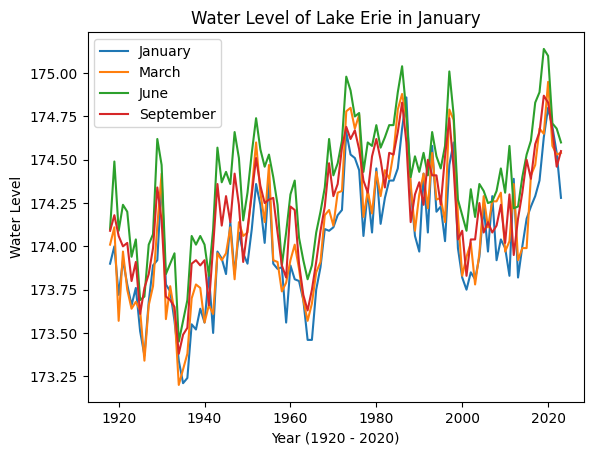

array(['Superior', 'Michigan-Huron', 'St. Clair', 'Erie', 'Ontario'],
      dtype=object)

In [119]:
erie = df[df["Lake"] == "Erie"].reset_index()
erie.head()


erie[erie["month"] == 1]["Water Level"]

plt.plot( erie[erie["month"] == 1]["year"],erie[erie["month"] == 1]["Water Level"], label = "January")
plt.plot( erie[erie["month"] == 3]["year"],erie[erie["month"] == 3]["Water Level"], label = "March")
plt.plot( erie[erie["month"] == 6]["year"],erie[erie["month"] == 6]["Water Level"], label = "June")
plt.plot( erie[erie["month"] == 9]["year"],erie[erie["month"] == 9]["Water Level"], label = "September")



plt.title('Water Level of Lake Erie in January')
plt.xlabel("Year (1920 - 2020)")
plt.ylabel("Water Level")
plt.legend()

plt.show()

df["Lake"].unique()


# See the water level from month to month has slight variation. How does the water level in a single month compare to between lakes.

In [120]:
lakes_summary_stats_2[lakes_summary_stats_2["month"] == 1].reset_index().drop("index", axis = 1)

/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_39087/2660064425.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  lakes_summary_stats_2[lakes_summary_stats_2["month"] == 1].reset_index().drop("index", axis = 1)


Lake month Water Level                                   
                               mean       std   median     min     max
0            Erie     1  174.030189  0.351895  173.995  173.21  174.86
1  Michigan-Huron     1  176.324623  0.395824  176.350  175.57  177.26
2         Ontario     1   74.577830  0.274289   74.585   73.81   75.16
3       St. Clair     1  174.874057  0.425977  174.865  173.88  175.80
4        Superior     1  183.337642  0.171662  183.330  182.83  183.71

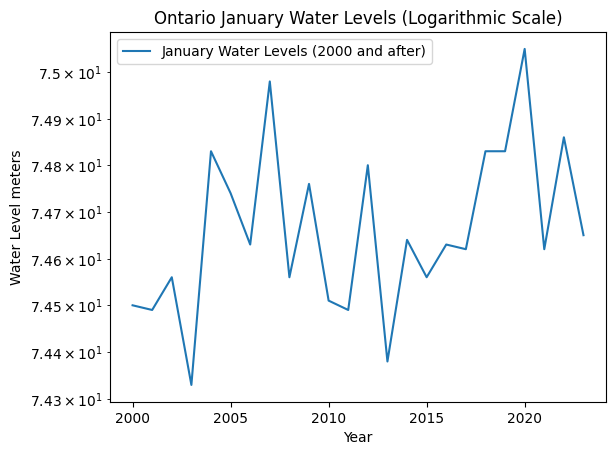

In [121]:
# Plot water levels in January on a logarithmic scale
plt.plot(
    ontario[(ontario["month"] == 1) & (ontario["year"] >= 2000)]["year"],  # X-axis
    ontario[(ontario["month"] == 1) & (ontario["year"] >= 2000)]["Water Level"],  # Y-axis
    label='January Water Levels (2000 and after)'
)


# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Water Level meters')
plt.title('Ontario January Water Levels (Logarithmic Scale)')
plt.legend()

# Display the plot
plt.show()


Initial water level: 74.74


KeyError: 'precipitation'

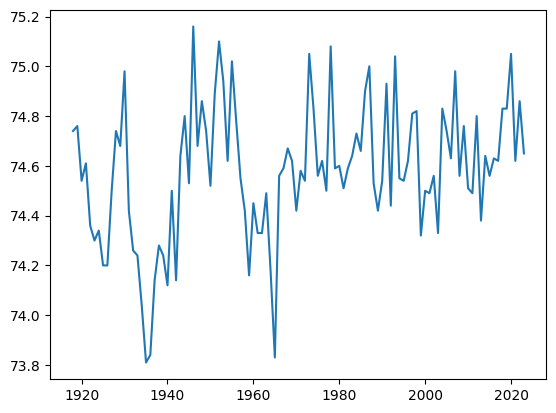

In [122]:
plt.plot(ontario[ontario["month"] == 1]["year"], ontario[ontario["month"] == 1]["Water Level"])
import matplotlib.pyplot as plt

# Function to simulate water level for a lake
def simulate_water_level(lake_df, initial_level, alpha, beta, gamma):
    levels = [initial_level]
    for t in range(1, len(lake_df)):
        precipitation = lake_df.loc[t, "precipitation"]
        evaporation = lake_df.loc[t, "evaporation"]
        flow = lake_df.loc[t, "flow"]
        # Compute water level change
        delta_H = (alpha * precipitation) - (beta * evaporation) - (gamma * flow)
        # print(f"t={t}, delta_H={delta_H}, levels[-1]={levels[-1]}")  # Debugging line
        new_level = levels[-1] + delta_H
        levels.append(new_level)
    return levels

# Example: Simulate for Lake Superior
initial_water_level = ontario["Water Level"].iloc[0]
print("Initial water level:", initial_water_level)  # Debugging line
ontario["simulated_water_level"] = simulate_water_level(
    ontario, initial_water_level, alpha=0.0256, beta=0.0122, gamma=0.00112
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ontario["simulated_water_level"], label="Simulated Water Level")
plt.axhline(y=176, color='red', linestyle='--', label='Optimal Water Level')
plt.title("Lake Michigan-Huron Water Level Simulation")
plt.xlabel("Time (Months)")
plt.ylabel("Water Level (m)")
plt.legend()
plt.grid()
plt.show()



In [123]:
df

,month,year,Lake,Water Level
0,1,1918,Superior,183.25
1,2,1918,Superior,183.20
2,3,1918,Superior,183.17
3,4,1918,Superior,183.14
4,5,1918,Superior,183.22
...,...,...,...,...
6355,8,2023,Ontario,75.06
6356,9,2023,Ontario,74.88
6357,10,2023,Ontario,74.66
6358,11,2023,Ontario,74.49


In [ ]:
import matplotlib.pyplot as plt

# Function to simulate water level for a lake
def simulate_water_level(lake_df, initial_level, alpha, beta, gamma):
    levels = [initial_level]
    for t in range(1, len(lake_df)):
        precipitation = lake_df.loc[t, "precipitation"]
        evaporation = lake_df.loc[t, "evaporation"]
        flow = lake_df.loc[t, "flow"]
        # Compute water level change
        delta_H = (alpha * precipitation) - (beta * evaporation) - (gamma * flow)
        # print(f"t={t}, delta_H={delta_H}, levels[-1]={levels[-1]}")  # Debugging line
        new_level = levels[-1] + delta_H
        levels.append(new_level)
    return levels

# Example: Simulate for Lake Superior
initial_water_level = lake_ontario_df["water level"].iloc[0]
print("Initial water level:", initial_water_level)  # Debugging line
lake_ontario_df["simulated_water_level"] = simulate_water_level(
    lake_ontario_df, initial_water_level, alpha=0.0256, beta=0.0122, gamma=0.00112
)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(lake_ontario_df["simulated_water_level"], label="Simulated Water Level")
plt.axhline(y=75, color='red', linestyle='--', label='Optimal Water Level')
plt.title("Lake Ontario Water Level Simulation")
plt.xlabel("Time (Months)")
plt.ylabel("Water Level (m)")
plt.legend()
plt.grid()
plt.show()


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Example synthetic dataset
# Year: 2000 to 2023
# Water Levels: Simulated values for January (log-transformed)
years = np.arange(2000, 2024)
water_levels = np.log10(
    np.array([
        74.3, 74.4, 74.5, 74.2, 74.6, 74.8, 75.0, 74.9, 74.7, 75.1, 75.3, 74.8, 74.5,
        74.6, 74.9, 75.2, 75.0, 74.7, 74.8, 74.9, 75.1, 75.4, 75.0, 74.7
    ])
)

# Polynomial regression model (degree 2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(years.reshape(-1, 1))

# Fit the model
model = LinearRegression()
model.fit(X_poly, water_levels)

# Predict water levels
predicted_levels = model.predict(X_poly)

# Convert back from log scale for visualization
predicted_levels_normal = 10**predicted_levels

# Plot
plt.figure(figsize=(10, 6))
plt.plot(years, 10**water_levels, label="Observed Water Levels", marker="o")
plt.plot(years, predicted_levels_normal, label="Model (Polynomial Fit)", linestyle="--")
plt.title("Ontario January Water Levels (Model Fit)")
plt.xlabel("Year")
plt.ylabel("Water Level (meters)")
plt.legend()
plt.grid()
plt.show()


ModuleNotFoundError: No module named 'sklearn'